# Demo Workflow: Working with SlideRunner Databases

In [ ]:
from SlideRunner.dataAccess.database import Database
import SlideRunner.dataAccess.database

### Open Demo database

In [ ]:
DB = Database().open('/Users/artemiorimando/PycharmProjects/samsung-capstone/databases/MITOS_WSI_CMC_CODAEL_TR_ROI.sqlite')

In [ ]:
slideid = DB.findSlideWithFilename('2d56d1902ca533a5b509.svs','')
DB.loadIntoMemory(slideid)

In [ ]:
for anno in DB.annotations.keys():
    print(anno,':',DB.annotations[anno])

1437 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034190>
1438 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034550>
1439 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034130>
1440 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034580>
1441 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca090344c0>
1442 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034520>
1443 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca090342b0>
1444 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca090344f0>
1445 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034280>
1446 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034250>
1447 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09034220>
1448 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7fca09

In [ ]:
DB.annotations.keys()

dict_keys([1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1596, 1597, 1599, 1600, 1601, 1602, 1603, 1604, 1605,

## Let's first assess the polygon (ID 1437)

In [ ]:
DB.annotations[1437].coordinates

array([[26895,  4861],
       [26945,  4911]])

This is the agreed class by all experts:

In [ ]:
DB.annotations[1437].agreedClass

2

## For circle annotations we can query the center coordinates and the radius

In [ ]:
DB.annotations[1437].x1, DB.annotations[1437].y1, DB.annotations[1437].r

(26920, 4886, 25)

Each object also provides a human readable description:

In [ ]:
DB.annotations[1437].getDescription(DB)

[['Position', 'x1=26920, y1=4886'],
 ['Anno 1', 'Mitotic figure (Christof)'],
 ['Anno 2', 'Mitotic figure (Robert)'],
 ['Anno 3', 'Mitotic figure (Christof and Robert)'],
 ['Agreed Class', 'Mitotic figure']]

In [44]:
DB.annotations[1647].x1, DB.annotations[1647].y1, DB.annotations[1647].r

(19694, 56818, 25)

In [ ]:
DB.annotations[1647].getDescription(DB)

[['Position', 'x1=19694, y1=56818'],
 ['Anno 1', 'Mitotic figure (Christof)'],
 ['Anno 2', 'Mitotic figure (Robert)'],
 ['Anno 3', 'Mitotic figure (Christof and Robert)'],
 ['Agreed Class', 'Mitotic figure']]

# Drawing 

In [35]:
import openslide
slide = openslide.open_slide('/Users/artemiorimando/PycharmProjects/samsung-capstone/WSI/2d56d1902ca533a5b509.svs')

In [148]:
import matplotlib.pyplot as plt
import numpy as np
lu = (19600,56700)
img = np.array(slide.read_region( lu, 0, [512,512]))[:,:,0:4]

The original image

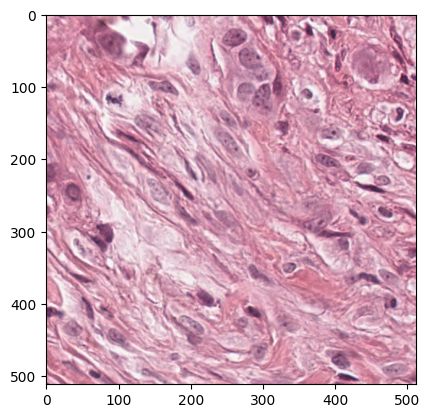

In [149]:
plt.imshow(img)

Now, let's add the circle annotation as an example

In [150]:
from SlideRunner.dataAccess.annotations import ViewingProfile
DB.annotations[1647].draw(image=img, leftUpper=lu, zoomLevel=1., thickness=5, vp=ViewingProfile())

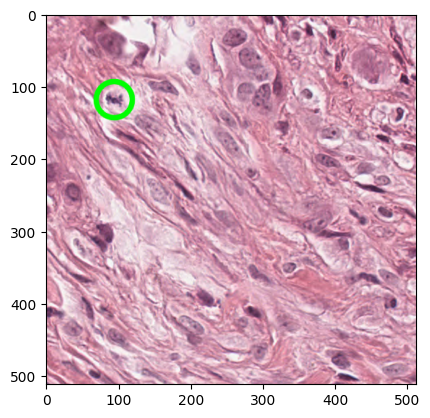

In [151]:
plt.imshow(img)

# Saving Example Images

In [154]:
from PIL import Image
im = Image.fromarray(img)
rgb_im = im.convert('RGB') 
rgb_im.save("sample.jpg")